In [67]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import time
import csv
import pandas as pd

In [68]:
# Initialize the Chrome browser
service = Service(executable_path='C:\\Users\\Shen_wei_Peh\\OneDrive - Dell Technologies\\Desktop\\Data_Science\\Applied Data Science\\\\Mini Project 1\\chromedriver.exe')
driver = webdriver.Chrome(service=service)
driver.get("https://www.booking.com/reviews/country/my.html") #scrape for Malaysia Hotel top reviews from Booking.com
htmlSource = driver.page_source
# Allow time for the page to load 
time.sleep(5)

In [69]:
# Scrape elements
soup = BeautifulSoup(htmlSource, 'html.parser')
def malaysia_hotel_data(soup):
    all_hotel_data = []

    for y in soup.find_all('div', {'class': 'rlp-main-section-hotel__subcontainer'}):
        hotel_name = y.find('a', {'class': 'rlp-main-section-hotel__name'})
        hotel_location = y.find('p', {'class': 'rlp-main-section-hotel__location'})
        hotel_rating = y.find('div', {'class': 'rlp-main-section-hotel__score'})
        hotel_review = y.find('p', {'class': 'rlp-main-section-hotel-review__txt'})
        if hotel_name and hotel_rating and hotel_review and hotel_location:
            hotel_text = hotel_name.get_text(strip=True)
            location_text = hotel_location.get_text(strip=True).split('\n')[-1].strip()
            rating_text = hotel_rating.get_text(strip=True).replace('Average Review Score: ', '')
            review_text = hotel_review.get_text(strip=True)
            all_hotel_data.append({
                "hotel_name": hotel_text,
                "hotel_location": location_text,
                "rating": rating_text,
                "review": review_text
            })
    return all_hotel_data

In [70]:
# confirm data hsd scraped successfully
malaysia = malaysia_hotel_data(soup)
my_df = pd.DataFrame(malaysia) 
my_df

,hotel_name,hotel_location,rating,review
0,Aayu Chulia,Malaysia,9.5,Aayu Chulia was the perfect stay in Georgetown...
1,SCC Hotel Chinatown,Malaysia,8.1,Clean and comfortable private room in a centra...
2,Scarletz Suites KLCC by M Suites,Malaysia,9.5,"Modern and high quality apartments, High floor..."
3,Relaxing Suite @Suzana The Shore Kota Kinabalu,Malaysia,8,Located just in front of Sabah Market. Very st...
4,Ibis Melaka,Malaysia,8,Location : good\nParking : good\nRoom : good\n...
5,Aloft Langkawi Pantai Tengah,Malaysia,8.9,"Great location ,great staff and a great view o..."
6,The Prestige Hotel Penang,Malaysia,8.7,"Very clean, great location, great food, great ..."
7,The RuMa Hotel and Residences,Malaysia,9.2,Very clean hotel and great location
8,Aras G Homestay,Malaysia,8.9,in front of field
9,The Jerai Hotel Alor Star,Malaysia,7.7,Location is the best..Staff service is excellent.


In [72]:
# calculate average rating score for each country 
my_df["rating"] = pd.to_numeric(my_df["rating"], errors='coerce')
# Calculate the average rating
MY_average_rating = my_df["rating"].mean()
print("\nMY Average Rating:", MY_average_rating)


Average Rating: 8.650000000000002


In [74]:
# Change webpage to scrape for Singapore Hotel top reviews from Booking.com
driver.get("https://www.booking.com/reviews/country/sg.html")
htmlSource = driver.page_source

In [75]:
# Scrape elements
soup = BeautifulSoup(htmlSource, 'html.parser')
def singapore_hotel_data(soup):
    singapore_hotel_data = []

    for y in soup.find_all('div', {'class': 'rlp-main-section-hotel__subcontainer'}):
        hotel_name = y.find('a', {'class': 'rlp-main-section-hotel__name'})
        hotel_location = y.find('p', {'class': 'rlp-main-section-hotel__location'})
        hotel_rating = y.find('div', {'class': 'rlp-main-section-hotel__score'})
        hotel_review = y.find('p', {'class': 'rlp-main-section-hotel-review__txt'})
        if hotel_name and hotel_rating and hotel_review and hotel_location:
            hotel_text = hotel_name.get_text(strip=True)
            location_text = hotel_location.get_text(strip=True).split('\n')[-1].strip()
            rating_text = hotel_rating.get_text(strip=True).replace('Average Review Score: ', '')
            review_text = hotel_review.get_text(strip=True)
            singapore_hotel_data.append({
                "hotel_name": hotel_text,
                "hotel_location": location_text,
                "rating": rating_text,
                "review": review_text
            })
    return singapore_hotel_data

In [76]:
singapore = singapore_hotel_data(soup)
sg_df = pd.DataFrame(singapore) 

In [78]:
sg_df["rating"] = pd.to_numeric(sg_df["rating"], errors='coerce')
# Calculate the average rating
SG_average_rating = sg_df["rating"].mean()
print("\nSG Average Rating:", SG_average_rating)


SG Average Rating: 7.655555555555555


In [79]:
# Change webpage to scrape for Thailand Hotel top reviews from Booking.com
driver.get("https://www.booking.com/reviews/country/th.en-gb.html")
htmlSource = driver.page_source

In [92]:
# Scrape elements
soup = BeautifulSoup(htmlSource, 'html.parser')
def thailand_hotel_data(soup):
    thailand_hotel_data = []

    for y in soup.find_all('div', {'class': 'rlp-main-section-hotel__subcontainer'}):
        hotel_name = y.find('a', {'class': 'rlp-main-section-hotel__name'})
        hotel_location = y.find('p', {'class': 'rlp-main-section-hotel__location'})
        hotel_rating = y.find('div', {'class': 'rlp-main-section-hotel__score'})
        hotel_review = y.find('p', {'class': 'rlp-main-section-hotel-review__txt'})
        if hotel_name and hotel_rating and hotel_review and hotel_location:
            hotel_text = hotel_name.get_text(strip=True)
            location_text = hotel_location.get_text(strip=True).split('\n')[-1].strip()
            rating_text = hotel_rating.get_text(strip=True).replace('Average review score: ', '')
            review_text = hotel_review.get_text(strip=True)
            thailand_hotel_data.append({
                "hotel_name": hotel_text,
                "hotel_location": location_text,
                "rating": rating_text,
                "review": review_text
            })
    return thailand_hotel_data

In [93]:
thailand = thailand_hotel_data(soup)
th_df = pd.DataFrame(thailand) 

In [95]:
th_df["rating"] = pd.to_numeric(th_df["rating"], errors='coerce')
# Calculate the average rating
TH_average_rating = th_df["rating"].mean()
print("\nTH Average Rating:", TH_average_rating)


TH Average Rating: 8.78


In [96]:
# Change webpage to scrape for Vietnam Hotel top reviews from Booking.com
driver.get("https://www.booking.com/reviews/country/vn.en-gb.html")
htmlSource = driver.page_source

In [100]:
# Scrape elements
soup = BeautifulSoup(htmlSource, 'html.parser')
def vietnam_hotel_data(soup):
    vietnam_hotel_data = []

    for y in soup.find_all('div', {'class': 'rlp-main-section-hotel__subcontainer'}):
        hotel_name = y.find('a', {'class': 'rlp-main-section-hotel__name'})
        hotel_location = y.find('p', {'class': 'rlp-main-section-hotel__location'})
        hotel_rating = y.find('div', {'class': 'rlp-main-section-hotel__score'})
        hotel_review = y.find('p', {'class': 'rlp-main-section-hotel-review__txt'})
        if hotel_name and hotel_rating and hotel_review and hotel_location:
            hotel_text = hotel_name.get_text(strip=True)
            location_text = hotel_location.get_text(strip=True).split('\n')[-1].strip()
            rating_text = hotel_rating.get_text(strip=True).replace('Average review score: ', '')
            review_text = hotel_review.get_text(strip=True)
            vietnam_hotel_data.append({
                "hotel_name": hotel_text,
                "hotel_location": location_text,
                "rating": rating_text,
                "review": review_text
            })
    return vietnam_hotel_data

In [101]:
vietnam = vietnam_hotel_data(soup)
vn_df = pd.DataFrame(vietnam) 

In [103]:
vn_df["rating"] = pd.to_numeric(vn_df["rating"], errors='coerce')
# Calculate the average rating
VN_average_rating = vn_df["rating"].mean()
print("\nVN Average Rating:", VN_average_rating)


VN Average Rating: 9.055555555555555


In [107]:
# Change webpage to scrape for Cambodia Hotel top reviews from Booking.com
driver.get("https://www.booking.com/reviews/country/kh.en-gb.html")
htmlSource = driver.page_source

In [108]:
# Scrape elements
soup = BeautifulSoup(htmlSource, 'html.parser')
def cambodia_hotel_data(soup):
    cambodia_hotel_data = []

    for y in soup.find_all('div', {'class': 'rlp-main-section-hotel__subcontainer'}):
        hotel_name = y.find('a', {'class': 'rlp-main-section-hotel__name'})
        hotel_location = y.find('p', {'class': 'rlp-main-section-hotel__location'})
        hotel_rating = y.find('div', {'class': 'rlp-main-section-hotel__score'})
        hotel_review = y.find('p', {'class': 'rlp-main-section-hotel-review__txt'})
        if hotel_name and hotel_rating and hotel_review and hotel_location:
            hotel_text = hotel_name.get_text(strip=True)
            location_text = hotel_location.get_text(strip=True).split('\n')[-1].strip()
            rating_text = hotel_rating.get_text(strip=True).replace('Average review score: ', '')
            review_text = hotel_review.get_text(strip=True)
            cambodia_hotel_data.append({
                "hotel_name": hotel_text,
                "hotel_location": location_text,
                "rating": rating_text,
                "review": review_text
            })
    return cambodia_hotel_data

In [109]:
cambodia = cambodia_hotel_data(soup)
cbd_df = pd.DataFrame(cambodia) 

In [110]:
cbd_df["rating"] = pd.to_numeric(cbd_df["rating"], errors='coerce')
# Calculate the average rating
CBD_average_rating = cbd_df["rating"].mean()
print("\nCBD Average Rating:", CBD_average_rating)


CBD Average Rating: 8.719999999999999


In [111]:
# append all the data into one dataframe
empty_df = pd.DataFrame()
empty_df = pd.concat([my_df, sg_df,th_df,vn_df,cbd_df], ignore_index = True) 
empty_df

,hotel_name,hotel_location,rating,review
0,Aayu Chulia,Malaysia,9.5,Aayu Chulia was the perfect stay in Georgetown...
1,SCC Hotel Chinatown,Malaysia,8.1,Clean and comfortable private room in a centra...
2,Scarletz Suites KLCC by M Suites,Malaysia,9.5,"Modern and high quality apartments, High floor..."
3,Relaxing Suite @Suzana The Shore Kota Kinabalu,Malaysia,8.0,Located just in front of Sabah Market. Very st...
4,Ibis Melaka,Malaysia,8.0,Location : good\nParking : good\nRoom : good\n...
5,Aloft Langkawi Pantai Tengah,Malaysia,8.9,"Great location ,great staff and a great view o..."
6,The Prestige Hotel Penang,Malaysia,8.7,"Very clean, great location, great food, great ..."
7,The RuMa Hotel and Residences,Malaysia,9.2,Very clean hotel and great location
8,Aras G Homestay,Malaysia,8.9,in front of field
9,The Jerai Hotel Alor Star,Malaysia,7.7,Location is the best..Staff service is excellent.


In [133]:
# save data to csv file    
csv_filename = "review_data.csv"
empty_df.to_csv(csv_filename, index=False)
print(f'Dataframe saved to {csv_filename}')

Dataframe saved to review_data.csv


In [112]:
import numpy as np
import pandas as pd
import re # Regular Expressions package
import nltk 
import string # To manipulate strings with
import spacy
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [ ]:
# Start building wordcloud for top and lowest average rating country's hotel which are Vietnam and Sinagpore respectively

In [113]:
df_text = vn_df[["review"]].copy()
df_text["review"] = df_text["review"].astype(str)
df_text["review_lower"] = df_text["review"].str.lower()
df_text.head()

,review,review_lower
0,Everything about this property was incredible....,everything about this property was incredible....
1,This is the cutest little place to stay in SaP...,this is the cutest little place to stay in sap...
2,"The room, the bath and view from the room & ba...","the room, the bath and view from the room & ba..."
3,"The staff were very friendly and helpful, the ...","the staff were very friendly and helpful, the ..."
4,Great location and facilities including a grea...,great location and facilities including a grea...


In [114]:

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


# Create and store custom punctuations
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [115]:
# Create a copy of the dataframe
df_final = df_text[['review_lower']].copy()

df_final['review_final'] = df_final['review_lower'].apply(remove_urls)
df_final['review_final'] = df_final['review_final'].apply(strip_all_entities)
df_final['review_final'] = df_final['review_final'].apply(remove_punctuation)
df_final['review_final'] = df_final['review_final'].apply(lemmatize_words)

# Remove frequent words
cnt = Counter()
for text in df_final["review_final"].values:
    for word in text.split():
        cnt[word] += 1
        
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df_final['review_final'] = df_final['review_final'].apply(lambda text: remove_freqwords(text))

In [116]:
df_final.head()

,review_lower,review_final
0,everything about this property was incredible....,property incredible i book female dorm it amaz...
1,this is the cutest little place to stay in sap...,cut little to stay sapa town away humdrum cafe...
2,"the room, the bath and view from the room & ba...",bath view bath amaze helpful calm area close b...
3,"the staff were very friendly and helpful, the ...",helpful quiet it towards back building air con...
4,great location and facilities including a grea...,facility include rooftop bar pool it’s solid 4...


In [117]:
doc = df_final['review_final'].tolist()

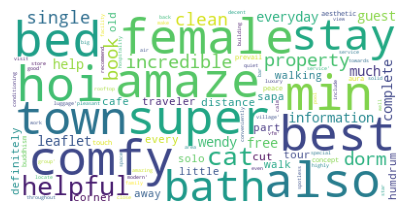

In [119]:
# Wordcloud for Vietnam
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# Remark: input data is list of sentences
wordcloud = WordCloud(background_color='white',
                      stopwords=stop_words, 
                      max_words=100,
                      max_font_size=50,
                      random_state=42).generate(str(doc))

print(wordcloud)
fig = plt.figure(figsize=(5, 5),)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("word1.png", dpi=900)


In [127]:
df_text1 = sg_df[["review"]].copy()
df_text1["review"] = df_text1["review"].astype(str)
df_text1["review_lower"] = df_text1["review"].str.lower()
df_text1.head()

,review,review_lower
0,Staff was very kind and helpful. I saw them cl...,staff was very kind and helpful. i saw them cl...
1,"The bed was comfy, the terrace had a great vie...","the bed was comfy, the terrace had a great vie..."
2,"Overall comfortable, fast service, excellent...","overall comfortable, fast service, excellent..."
3,breakfast was excellent with great variety of ...,breakfast was excellent with great variety of ...
4,Super convenient and very clean,super convenient and very clean


In [128]:
def strip_all_entities(text1):
  
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text1 = text1.replace(separator,' ')
    words = []
    for word in text1.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def remove_urls(text1):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text1)


# Create and store custom punctuations, you can add as you please
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text1):
    """custom function to remove the punctuation"""
    return text1.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text1):
    pos_tagged_text1 = nltk.pos_tag(text1.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text1])

In [129]:
# Create a copy of the dataframe
df_final1 = df_text1[['review_lower']].copy()

df_final1['review_final'] = df_final1['review_lower'].apply(remove_urls)
df_final1['review_final'] = df_final1['review_final'].apply(strip_all_entities)
df_final1['review_final'] = df_final1['review_final'].apply(remove_punctuation)
df_final1['review_final'] = df_final1['review_final'].apply(lemmatize_words)

# Remove frequent words
cnt = Counter()
for text in df_final["review_final"].values:
    for word in text.split():
        cnt[word] += 1
        
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])

def remove_freqwords(text1):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text1).split() if word not in FREQWORDS])

df_final1['review_final'] = df_final1['review_final'].apply(lambda text: remove_freqwords(text))

In [130]:
doc1 = df_final1['review_final'].tolist()

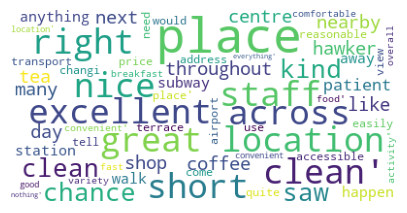

In [132]:
# Wordcloud for Singapore
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# Remark: input data is list of sentences
wordcloud = WordCloud(background_color='white',
                      stopwords=stop_words, 
                      max_words=100,
                      max_font_size=50,
                      random_state=42).generate(str(doc1))

print(wordcloud)
fig = plt.figure(figsize=(5, 5),)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("word1.png", dpi=900)